In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
def bar_plot_column(df, name):
    plt.figure(figsize = (8,10))
    sns.countplot(y=name, data=df, order=df[name].value_counts().index)
    plt.title('Count of ' + name)
    plt.ylabel(name)
    plt.xlabel('Count')
    plt.show()


In [3]:
data = pd.read_csv('../../data/processed/merged_data_2.csv')
print('Dataset Shape: ', data.shape)

/home/djordje/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Dataset Shape:  (727335, 33)


In [4]:
data['MINUTE'] = data['CRASH TIME'].apply(lambda x: x.split(':')[1])
data['MINUTE'] = data['MINUTE'].astype(int)
data['YEAR'] = (data['CRASH DATE'].apply(lambda x: x.split('-')[0])).astype(int)
data['MONTH'] = (data['CRASH DATE'].apply(lambda x: x.split('-')[1])).astype(int)
data['DOW'] = (data['CRASH DATE'].apply(lambda x: pd.Timestamp(x).dayofweek)).astype(int)
data = data.drop(columns=['CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'geometry', 'NonPed', 'Wind',
                                  'XFrom', 'YFrom', 'XTo', 'YTo', 'TRUCK_ROUTE_TYPE', 'ON STREET NAME',
                                  'MINUTE', 'YEAR'])

data = data.dropna()

In [5]:
data.head()

,BOROUGH,LATITUDE,LONGITUDE,HOUR,Temperature,FeelsLike,Dew,Humidity,WindSpeed,Pressure,...,Clouds,SEVERITY,StreetWidth_Min,POSTED_SPEED,Snow_Priority,Number_Travel_Lanes,Number_Park_Lanes,Number_Total_Lanes,MONTH,DOW
0,MANHATTAN,40.70983,-74.01468,20,43,35.0,31.0,62,17.0,29.50,...,FEW,0,26.0,30,C,2,0,2,11,6
1,MANHATTAN,40.70983,-74.01468,18,67,67.0,51.0,57,10.0,30.21,...,OVC,0,26.0,30,C,2,0,2,9,0
2,MANHATTAN,40.70983,-74.01468,21,74,74.0,56.0,53,7.0,30.00,...,SCT,0,26.0,30,C,2,0,2,9,1
3,MANHATTAN,40.70983,-74.01468,18,74,74.0,66.0,76,13.0,30.14,...,OVC,0,26.0,30,C,2,0,2,9,5
4,MANHATTAN,40.70983,-74.01468,8,46,40.0,38.0,73,15.0,29.67,...,OVC,0,26.0,30,C,2,0,2,4,3


In [18]:
np.max(data['Dew'])

78.0

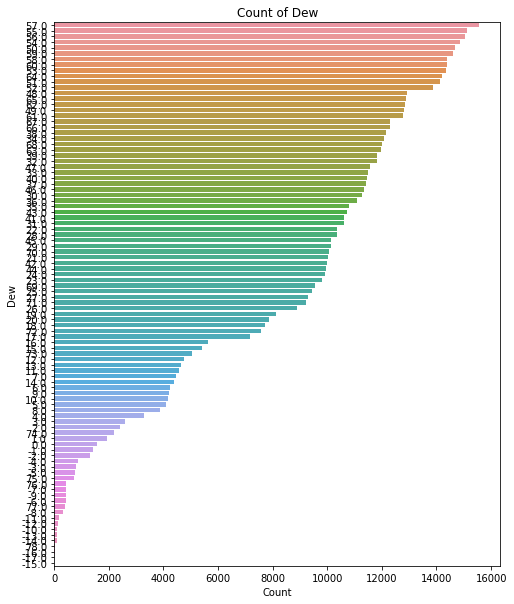

In [19]:
bar_plot_column(data, 'Dew')